In [2]:
import pandas as pd

import glob
import os

path = r'path'


all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [3]:
#converting the object data type columns to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [4]:
#Ride duration of each ride
df['ride_duration'] =  df['ended_at'] - df['started_at']

In [5]:
#selecting the data only with null values and counting
start_station_name_na_data = df.loc[df['start_station_name'].isnull()]
start_station_name_na_data.rideable_type.value_counts()

electric_bike    948049
Name: rideable_type, dtype: int64

In [6]:
#selecting the data only with null values and counting
start_station_id_na_data = df.loc[df['start_station_id'].isnull()]
start_station_id_na_data.rideable_type.value_counts()

electric_bike    948046
Name: rideable_type, dtype: int64

In [7]:
#What are the other types of these bikes in the dataset?
df.rideable_type.value_counts()

classic_bike     3562550
electric_bike    2876897
docked_bike       284426
Name: rideable_type, dtype: int64

In [8]:
#What are the other types of these bikes in the dataset?
df.rideable_type.value_counts()

classic_bike     3562550
electric_bike    2876897
docked_bike       284426
Name: rideable_type, dtype: int64

In [9]:
start_station_name_na_data['ride_duration'].describe()

count                       948049
mean     0 days 00:14:34.093105947
std      0 days 00:18:53.713756659
min              -1 days +21:42:35
25%                0 days 00:05:17
50%                0 days 00:09:51
75%                0 days 00:18:10
max                0 days 08:00:31
Name: ride_duration, dtype: object

In [10]:
start_station_id_na_data['ride_duration'].describe()

count                       948046
mean     0 days 00:14:34.093418462
std      0 days 00:18:53.714942534
min              -1 days +21:42:35
25%                0 days 00:05:17
50%                0 days 00:09:51
75%                0 days 00:18:10
max                0 days 08:00:31
Name: ride_duration, dtype: object

In [11]:
start_station_id_na_data.groupby(['rideable_type','member_casual'])['ride_duration'].describe()


count                      mean  \
rideable_type member_casual                                     
electric_bike casual         416603 0 days 00:17:22.783028446   
              member         531443 0 days 00:12:21.856099337   

                                                  std               min  \
rideable_type member_casual                                               
electric_bike casual        0 days 00:21:31.765066271 -1 days +21:42:35   
              member        0 days 00:16:12.115618317 -1 days +22:02:54   

                                        25%             50%             75%  \
rideable_type member_casual                                                   
electric_bike casual        0 days 00:06:45 0 days 00:12:07 0 days 00:21:09   
              member        0 days 00:04:32 0 days 00:08:15 0 days 00:15:38   

                                        max  
rideable_type member_casual                  
electric_bike casual        0 days 08:00:31  
              member        0 days 08:00:31

Minimum value of ride is minus so I already caught couple of outliers of electric bikes. It is interesting that only electric bikes have this issue.

# End station null value examination

In [12]:
end_station_name_na_data = df.loc[df['end_station_name'].isnull()]
end_station_name_na_data.rideable_type.value_counts()

electric_bike    1003284
classic_bike        7996
docked_bike         1774
Name: rideable_type, dtype: int64

Bike types have saturated when I search for rides where there is no end station data. So maybe some bike may have not been returned at all.

In [13]:
ride_duration_na_data = df.loc[df['ride_duration'].isnull()]
ride_duration_na_data.rideable_type.value_counts()

Series([], Name: rideable_type, dtype: int64)

Hmm.. no data at all so I assume those bikes have been returned but no data is generated about the station. For the electric bikes maybe it is the case but how about classic or docked bikes?

In [14]:
end_station_id_na_data = df.loc[df['end_station_id'].isnull()]
end_station_id_na_data.rideable_type.value_counts()

electric_bike    1003284
classic_bike        7996
docked_bike         1774
Name: rideable_type, dtype: int64

In [15]:
end_station_id_na_data.groupby(['rideable_type','member_casual'])['ride_duration'].describe()

count                      mean  \
rideable_type member_casual                                     
classic_bike  casual           4953 0 days 16:41:30.346658590   
              member           3043 0 days 07:30:07.156095957   
docked_bike   casual           1774 2 days 22:04:06.620067643   
electric_bike casual         477653 0 days 00:18:06.732320324   
              member         525631 0 days 00:12:08.641212181   

                                                  std               min  \
rideable_type member_casual                                               
classic_bike  casual        0 days 10:53:37.897111900   0 days 00:00:00   
              member        0 days 09:52:41.102439625   0 days 00:00:00   
docked_bike   casual        4 days 00:09:43.307028879   0 days 00:00:28   
electric_bike casual        0 days 00:24:16.244539667 -1 days +21:42:35   
              member        0 days 00:17:42.913771968 -1 days +22:02:54   

                                               25%             50%  \
rideable_type member_casual                                          
classic_bike  casual               0 days 02:34:08 1 days 00:59:49   
              member               0 days 00:20:24 0 days 01:33:54   
docked_bike   casual        0 days 14:35:34.500000 1 days 01:00:01   
electric_bike casual               0 days 00:06:27 0 days 00:11:57   
              member               0 days 00:04:18 0 days 00:07:45   

                                               75%              max  
rideable_type member_casual                                          
classic_bike  casual               1 days 00:59:54  1 days 01:59:56  
              member        0 days 14:58:26.500000  1 days 01:59:54  
docked_bike   casual               3 days 11:14:30 25 days 04:17:48  
electric_bike casual               0 days 00:21:50  0 days 08:07:16  
              member               0 days 00:14:56  0 days 10:14:24

Average and maximum values for docked and classic bikes are a bit irrationally high compared to electric bikes. Since the company offers a full-day trip and a single trip to its customers, it is really strange to think someone renting a bike for 25 days or riding a bike for 16 hours. Technically, it is possible but I believe there is a problem. 
 
-At this point, I feel like I need to contact the other departments to inform them and ask them questions. 
Questions:
-Are these bikes returned at all? Or after some time system automatically generate an ending code?
-Are there any security issues that some users may abuse in their favor? If stations are full how a docked bike can be returned at that specific station?
etc.

However, in my case, I can not ask any questions to anyone so I am going to create an assumption about what went wrong.



# Latitude and longtitude missing value investigation

In [16]:
end_lat_na_data = df.loc[df['end_lat'].isnull()]
end_lat_na_data.rideable_type.value_counts()

classic_bike    4547
docked_bike     1774
Name: rideable_type, dtype: int64

In [17]:
end_lon_na_data = df.loc[df['end_lng'].isnull()]
end_lon_na_data.rideable_type.value_counts()

classic_bike    4547
docked_bike     1774
Name: rideable_type, dtype: int64

In [18]:
end_lon_na_data.groupby(['rideable_type','member_casual'])['ride_duration'].describe()

count                      mean  \
rideable_type member_casual                                   
classic_bike  casual         3600 0 days 21:34:50.758333333   
              member          947 0 days 17:19:25.009503695   
docked_bike   casual         1774 2 days 22:04:06.620067643   

                                                  std             min  \
rideable_type member_casual                                             
classic_bike  casual        0 days 07:53:18.741883167 0 days 00:00:06   
              member        0 days 10:42:52.100621321 0 days 00:00:05   
docked_bike   casual        4 days 00:09:43.307028879 0 days 00:00:28   

                                               25%             50%  \
rideable_type member_casual                                          
classic_bike  casual               1 days 00:59:45 1 days 00:59:53   
              member        0 days 03:16:36.500000 1 days 00:59:51   
docked_bike   casual        0 days 14:35:34.500000 1 days 01:00:01   

                                        75%              max  
rideable_type member_casual                                   
classic_bike  casual        1 days 00:59:55  1 days 01:59:56  
              member        1 days 00:59:54  1 days 01:59:54  
docked_bike   casual        3 days 11:14:30 25 days 04:17:48

# The question raised in my head and I wanted to investigate if there are any rides with that start station name exists but the end station name is an NA value

In [19]:
end_station_id_na_data['end_station_name'].isnull().sum()


1013054

In [20]:
end_station_id_na_data['start_station_name'].isnull().sum()

558781

Almost half of the rides have station name data for where the ride started, which is interesting. Let's dig a bit deeper.

In [21]:
#selecting the data that has start station for a ride but have no end station 
end_station_id_na_data_start_station_name= end_station_id_na_data[end_station_id_na_data['start_station_name'].notnull()]
end_station_id_na_data_start_station_name.groupby(['rideable_type','member_casual'])['ride_duration'].describe()

count                      mean  \
rideable_type member_casual                                     
classic_bike  casual           4953 0 days 16:41:30.346658590   
              member           3043 0 days 07:30:07.156095957   
docked_bike   casual           1774 2 days 22:04:06.620067643   
electric_bike casual         222162 0 days 00:19:27.613979888   
              member         222341 0 days 00:13:17.553631583   

                                                  std               min  \
rideable_type member_casual                                               
classic_bike  casual        0 days 10:53:37.897111900   0 days 00:00:00   
              member        0 days 09:52:41.102439625   0 days 00:00:00   
docked_bike   casual        4 days 00:09:43.307028879   0 days 00:00:28   
electric_bike casual        0 days 00:25:03.450004935 -1 days +23:01:58   
              member        0 days 00:18:31.965559046 -1 days +23:23:06   

                                               25%             50%  \
rideable_type member_casual                                          
classic_bike  casual               0 days 02:34:08 1 days 00:59:49   
              member               0 days 00:20:24 0 days 01:33:54   
docked_bike   casual        0 days 14:35:34.500000 1 days 01:00:01   
electric_bike casual               0 days 00:07:02 0 days 00:12:45   
              member               0 days 00:05:02 0 days 00:09:01   

                                               75%              max  
rideable_type member_casual                                          
classic_bike  casual               1 days 00:59:54  1 days 01:59:56  
              member        0 days 14:58:26.500000  1 days 01:59:54  
docked_bike   casual               3 days 11:14:30 25 days 04:17:48  
electric_bike casual               0 days 00:23:24  0 days 08:07:16  
              member               0 days 00:16:28  0 days 10:14:24

I want to see the comparison of no data for start or end station names that exist for a ride.

In [22]:
no_station_name_data_at_all = df[(df['start_station_name'].isnull() & df['end_station_name'].isnull())]
no_station_name_data_at_all.groupby(['rideable_type', 'member_casual'])['ride_duration'].describe()

count                      mean  \
rideable_type member_casual                                     
electric_bike casual         255491 0 days 00:16:56.401736264   
              member         303290 0 days 00:11:18.121721784   

                                                  std               min  \
rideable_type member_casual                                               
electric_bike casual        0 days 00:23:30.153769800 -1 days +21:42:35   
              member        0 days 00:17:02.520315384 -1 days +22:02:54   

                                        25%             50%             75%  \
rideable_type member_casual                                                   
electric_bike casual        0 days 00:05:59 0 days 00:11:17 0 days 00:20:37   
              member        0 days 00:03:55 0 days 00:06:53 0 days 00:13:39   

                                        max  
rideable_type member_casual                  
electric_bike casual        0 days 08:00:31  
              member        0 days 08:00:31

okay.. so only electric bikes have the problem of generating either start or end station names but they have been returned the most after 8 hours. However, the average for the other bike types is unreasonably high because nobody rides a bike for a full day or three days, and some of the docked bikes were out for 25 days which is absurd, and a great cost for a company.


#So let me see if there are data with no start station name but an end station name.

In [23]:
no_start_but_end_station_data = df[(df['start_station_name'].isnull() & df['end_station_name'].notnull())]
no_start_but_end_station_data.groupby(['rideable_type', 'member_casual'])['ride_duration'].describe()



count                      mean  \
rideable_type member_casual                                     
electric_bike casual         161115 0 days 00:18:04.612655556   
              member         228153 0 days 00:13:46.579944160   

                                                  std               min  \
rideable_type member_casual                                               
electric_bike casual        0 days 00:17:56.355342022 -1 days +21:49:58   
              member        0 days 00:14:53.748010796 -1 days +23:18:08   

                                        25%             50%             75%  \
rideable_type member_casual                                                   
electric_bike casual        0 days 00:07:59 0 days 00:13:15 0 days 00:21:51   
              member        0 days 00:05:48 0 days 00:10:13 0 days 00:17:39   

                                        max  
rideable_type member_casual                  
electric_bike casual        0 days 08:00:31  
              member        0 days 07:59:59

I believe there is a bug that needs to be fixed about generating the data of station names. Probably you can leave the electric bike wherever you want within the zone there is no station name.
** Suggestion: Maybe the nearest station could be given for both start or end station names.

# Investigating the number of bikes that have been rented for more than 10 hours and trips that have no end station name data.

In [24]:
#I couldn't find the way to filter the string data so I convert the column to total seconds and divided it to find minutes
df['ride_duration'] = (df['ride_duration'].dt.total_seconds()/60).astype(int)

In [25]:
#numbers of rides for longer than 10 hours. I chose 10 hours because the number seemed reasonable. 
df[df['ride_duration']>600].groupby(['rideable_type','member_casual'])['ride_duration'].size()

rideable_type  member_casual
classic_bike   casual           4716
               member           1371
docked_bike    casual           3203
electric_bike  member              1
Name: ride_duration, dtype: int64

In [26]:
start_yes_but_no_end = df[(df['start_station_id'].notna()) & (df['end_station_id'].isna())]

In [27]:
#I believe these bikes are gone and some of them returned back
start_yes_but_no_end[start_yes_but_no_end['ride_duration']>600].groupby(['rideable_type','member_casual'])['ride_duration'].size()

rideable_type  member_casual
classic_bike   casual           3289
               member            889
docked_bike    casual           1378
electric_bike  member              1
Name: ride_duration, dtype: int64

**My theory and suggestion to fix the problem**

I am thinking if the station is full, to return the docked bike you have to open your navigation through the app and unlock the lock of your bike, and return. However, what if you don't? Trusting the customer seemed to me that cause harm to the business therefore reducing the number of docked bikes from circulation or installing more stations can solve the problem. Because the same problem didn't occur with electric or classic bikes.  

Or maybe irresponsible CASUAL customers never even bothered to secure the bike during the return process because there was no consequence?

My suggestion is if you are not a member you have to pay the deposit to use the bikes, this solution may discourage some users but if it's well explained to the customers why the company is taking such aggressive action towards casual users, most of the users would understand the situation, at least the sympathy invoking well-written message would help the company to not lose trustworthiness, and it would increase the number of member users.

# Let's keep continue with cleaning the data after dropping the NA values

In [28]:
#Because the mean values are quite similar so I don't see any problem dropping them and my further codes will be executed faster
df = df.dropna()
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration
0,0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual,35
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual,18
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member,17
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member,15
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6722923,6394A34ACAA198A6,electric_bike,2022-07-25 11:21:39,2022-07-25 11:23:28,California Ave & Altgeld St,15646,California Ave & Milwaukee Ave,13084,41.926633,-87.697727,41.922695,-87.697153,member,1
6722926,3276F1017BD0CFA6,electric_bike,2022-07-23 12:42:19,2022-07-23 12:49:48,California Ave & Altgeld St,15646,California Ave & Division St,13256,41.926623,-87.697759,41.903029,-87.697474,casual,7
6722982,B0FD149163D58D01,classic_bike,2022-07-21 07:28:01,2022-07-21 07:31:18,Damen Ave & Grand Ave,TA1308000006,Wood St & Chicago Ave,637,41.892394,-87.676885,41.895634,-87.672069,member,3
6723235,A597A11985C1FEC2,classic_bike,2022-07-10 20:44:11,2022-07-10 20:45:26,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,1


In [29]:
#let's search for outliers
df.groupby(['rideable_type', 'member_casual'])['ride_duration'].describe()

count       mean         std    min   25%  \
rideable_type member_casual                                                  
classic_bike  casual         1369428.0  24.481768   42.534202  -53.0   9.0   
              member         2185126.0  12.740060   19.269697  -54.0   5.0   
docked_bike   casual          282652.0  61.905626  473.697613  -40.0  16.0   
electric_bike casual          666707.0  18.043659   19.875762 -127.0   7.0   
              member          817638.0  10.899015   11.806268 -129.0   5.0   

                              50%   75%      max  
rideable_type member_casual                       
classic_bike  casual         15.0  27.0   1499.0  
              member          9.0  16.0   1492.0  
docked_bike   casual         28.0  53.0  49107.0  
electric_bike casual         12.0  21.0    480.0  
              member          8.0  14.0    478.0

In [30]:
#filtering out the minus data
no_minus_ride_data = df[(df['ride_duration']>0)]


In [31]:
no_minus_ride_data.groupby(['rideable_type','member_casual'])['ride_duration'].describe()

count       mean         std  min   25%  \
rideable_type member_casual                                                
classic_bike  casual         1353268.0  24.774377   42.702420  1.0   9.0   
              member         2152582.0  12.932923   19.350114  1.0   5.0   
docked_bike   casual          280752.0  62.325230  475.270220  1.0  16.0   
electric_bike casual          656766.0  18.317448   19.898531  1.0   7.0   
              member          799927.0  11.140818   11.821176  1.0   5.0   

                              50%   75%      max  
rideable_type member_casual                       
classic_bike  casual         15.0  27.0   1499.0  
              member          9.0  16.0   1492.0  
docked_bike   casual         28.0  53.0  49107.0  
electric_bike casual         12.0  22.0    480.0  
              member          8.0  14.0    478.0

** My hypothesis: The company is charging the single ride of a full day pass but I believe nobody rents a bike for a second or a minute. It must be at least 10 minutes, and even if a customer bought a day pass, doesn't mean that you would ride a bike for 24 hours just because you paid for it. Therefore, I have filtered out the duration of the ride between 10 minutes and 10 hours.

In [32]:
ten_minutes_ten_hours_data = df[(df['ride_duration']>=10) & (df['ride_duration']<=600)]
ten_minutes_ten_hours_data.groupby(['rideable_type', 'member_casual'])['ride_duration'].describe()


count       mean        std   min   25%  \
rideable_type member_casual                                                
classic_bike  casual          964790.0  30.929548  32.618205  10.0  14.0   
              member         1049555.0  20.470853  15.565949  10.0  12.0   
docked_bike   casual          249548.0  48.708128  51.527462  10.0  19.0   
electric_bike casual          405003.0  26.043177  21.986278  10.0  13.0   
              member          341978.0  18.902026  14.656328  10.0  12.0   

                              50%   75%    max  
rideable_type member_casual                     
classic_bike  casual         21.0  34.0  600.0  
              member         17.0  24.0  600.0  
docked_bike   casual         30.0  58.0  600.0  
electric_bike casual         18.0  30.0  480.0  
              member         15.0  21.0  478.0

What happens when I exceed to 5 minutes?

In [33]:
five_minutes_ten_hours_data = df[(df['ride_duration']>=5) & (df['ride_duration']<=600)]
five_minutes_ten_hours_data.groupby(['rideable_type', 'member_casual'])['ride_duration'].describe()


count       mean        std  min   25%   50%  \
rideable_type member_casual                                                     
classic_bike  casual         1255041.0  25.418282  30.319960  5.0  10.0  16.0   
              member         1730699.0  15.105700  13.858768  5.0   7.0  11.0   
docked_bike   casual          272852.0  45.169649  50.621624  5.0  17.0  28.0   
electric_bike casual          586201.0  20.155155  20.299404  5.0   8.0  13.0   
              member          624057.0  13.445921  12.437287  5.0   7.0  10.0   

                              75%    max  
rideable_type member_casual               
classic_bike  casual         29.0  600.0  
              member         19.0  600.0  
docked_bike   casual         54.0  600.0  
electric_bike casual         23.0  480.0  
              member         16.0  478.0

Hmm... The ride number has almost doubled for the electric bike member riders and for the classic bike member size increased by 70 percent. Most member-type users prefer to have short rides.

What if I exceed the number until 1 minute?

In [34]:
one_minutes_ten_hours_data = df[(df['ride_duration']>=1) & (df['ride_duration']<=600)]
one_minutes_ten_hours_data.groupby(['rideable_type', 'member_casual'])['ride_duration'].describe()


count       mean        std  min   25%   50%  \
rideable_type member_casual                                                     
classic_bike  casual         1351841.0  23.814095  29.781086  1.0   9.0  15.0   
              member         2152100.0  12.729769  13.335161  1.0   5.0   9.0   
docked_bike   casual          278927.0  44.247441  50.447613  1.0  16.0  28.0   
electric_bike casual          656766.0  18.317448  19.898531  1.0   7.0  12.0   
              member          799927.0  11.140818  11.821176  1.0   5.0   8.0   

                              75%    max  
rideable_type member_casual               
classic_bike  casual         27.0  600.0  
              member         16.0  600.0  
docked_bike   casual         52.0  600.0  
electric_bike casual         22.0  480.0  
              member         14.0  478.0

- As soon as I started the trip duration time to 5 minutes then 1 minute the data frame for both member and causal riders number has been doubled up for electric, and classic bike rides. Therefore, members prefer to have less than 10-minute rides.

-When I increased the filter from one hour to ten hours maximum rides for electric bike users couldn't reach the top, and for casual riders the number stayed around 400 minutes, and for members, it stayed around 480 minutes. Probably because of the battery lifespan of each bike. 

- Docked bikes are the bikes that have been used by the nonmember community and are the most problematic and the least used ones compare to the other types of bikes.
** I wish I had the profit margin data for each type of bike so I could judge them better. However, I would slowly dispose of the docked bikes from the fleet, and more classic and electric bikes because people tend to prefer them over docked bikes.
**Since the objective is finding the pattern difference or a pattern between member and casula riders in how they use the bikes, I believe I find some quite usable information about them.

-Most of the trips that have taken place was between 1 to 10 minutes among both types of users. 

# What if I want to see the monthly and daily trip numbers?

In [35]:
data = df[(df['ride_duration']>=1) & (df['ride_duration']<=600)]


In [36]:
#adding the month name value
data['month'] = data['started_at'].dt.month_name()


C:\Users\Can PC\AppData\Local\Temp\ipykernel_12800\4012068152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['started_at'].dt.month_name()


In [37]:
data['day'] = data['started_at'].dt.day_name()


C:\Users\Can PC\AppData\Local\Temp\ipykernel_12800\2820717834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day'] = data['started_at'].dt.day_name()


In [38]:
data.rideable_type.value_counts()

classic_bike     3503941
electric_bike    1456693
docked_bike       278927
Name: rideable_type, dtype: int64

# I tried to write the data in xlsx format and do the visualization in Tableau but the size is too big so I decided to do research and how to visualize it in python.

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns




Text(0.5, 0, 'Total Trip Numbers in Million')

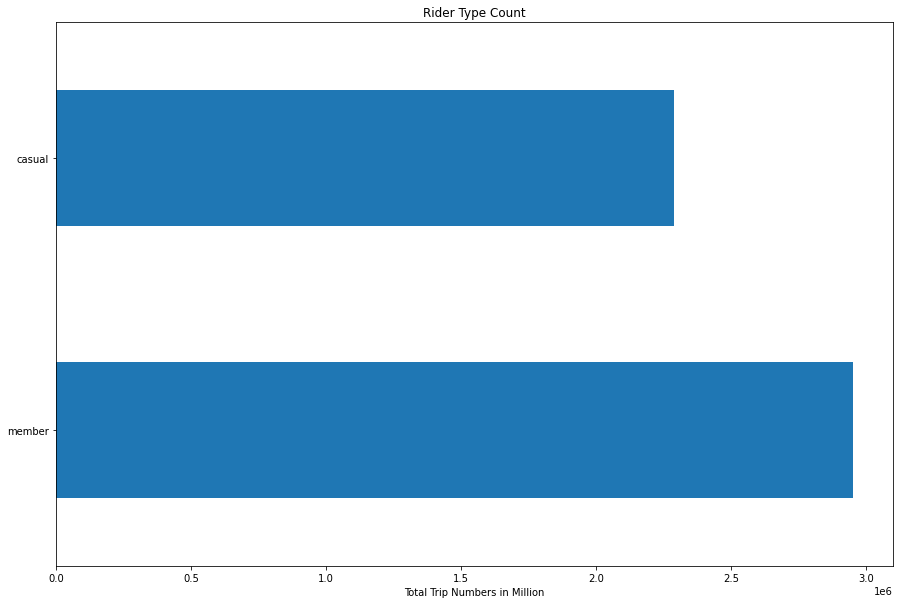

In [70]:
data.member_casual.value_counts().plot(kind='barh',figsize=(15,10),title='Rider Type Count')
plt.xlabel('Total Trip Numbers in Million')

Members have used the service more than casual riders

Text(0.5, 0, 'Bike and Member Types')

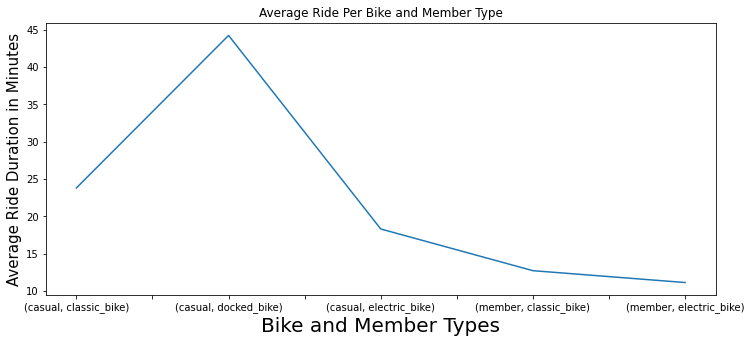

In [78]:
from numpy import size


data.groupby(['member_casual','rideable_type'])['ride_duration'].mean().plot(figsize=(12,5),title='Average Ride Per Bike and Member Type')
plt.ylabel('Average Ride Duration in Minutes',size=15)
plt.xlabel('Bike and Member Types',size=20)

- Most prefered bike is the docked bike by the casual riders
- Second best is the classic bike rides, again by the casual riders 
- Electric bikes are the least favorable among other types

Casual riders tend to use the bikes for a longer period of time because of the pricing model. Remember, company's charging model is a single ride or a full-day pass among casual riders but for the members there is no information about the charging policy. 


Text(0, 0.5, 'Total Ride Numbers')

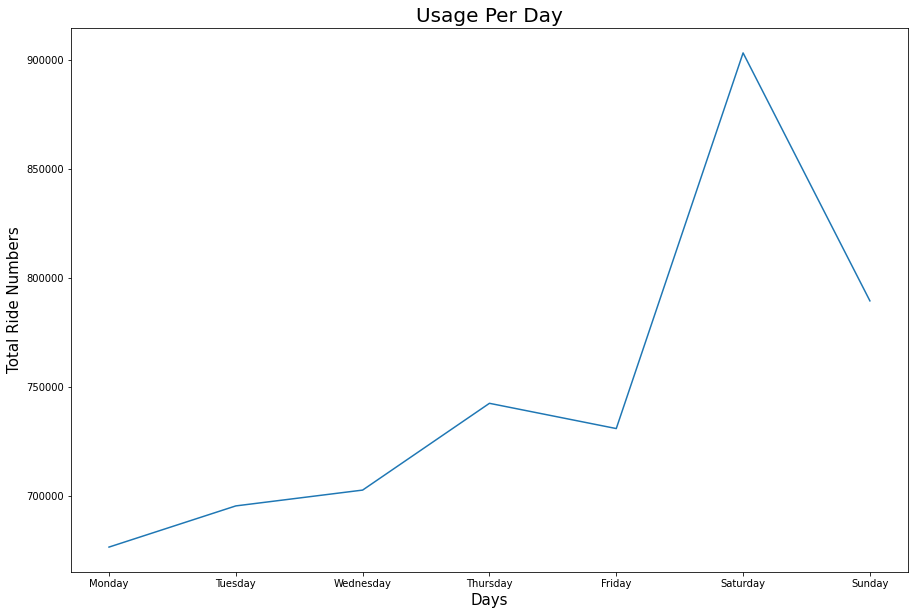

In [87]:
data.groupby('day')['ride_id'].count().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).plot(figsize=(15,10))
plt.title('Usage Per Day', size=20)
plt.xlabel('Days',size=15)
plt.ylabel('Total Ride Numbers',size=15)


As I hypothesised, people use bikes during the weekends the most, especially it peaks on Saturdays. But I have to see the rider's type before I come to cunclusion.


Text(0, 0.5, 'Total Ride Numbers')

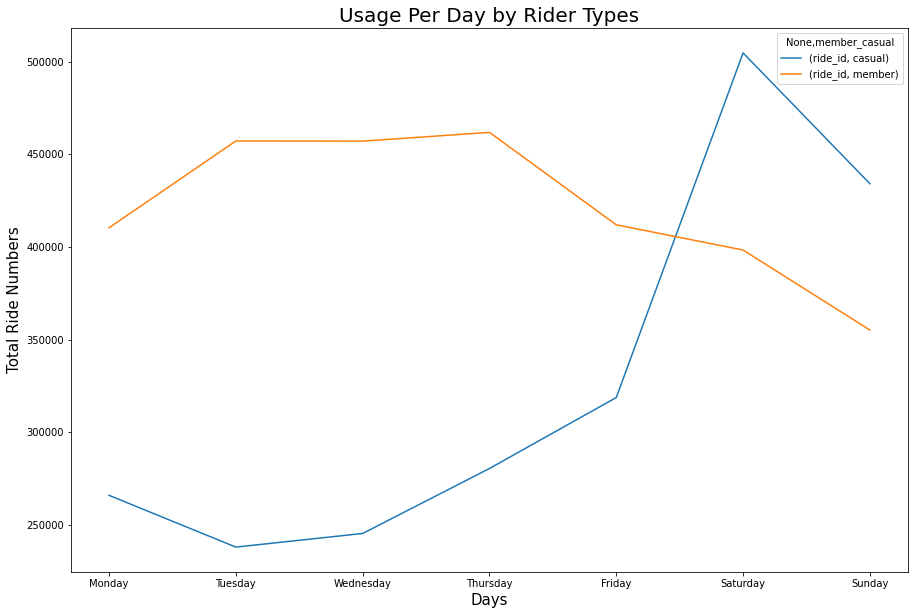

In [93]:
data.pivot_table(index= 'day',columns=['member_casual'],aggfunc={'ride_id':'count'}).reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).plot(figsize=(15,10))
plt.title('Usage Per Day by Rider Types', size=20)
plt.xlabel('Days',size=15)
plt.ylabel('Total Ride Numbers',size=15)

- Members prefer to use the service during the weekdays
- Contrast to that casual riders prefer the weekends. Especially Saturdays.

My conclusion about the customer profile is members are working class people who prefer to take a bike ride to go to the work, and tend to stay at home during the weekends.
Casual riders are students or tourist who 

Text(5, 32, 'Ride duration peaks with the warm and sunny weathers')

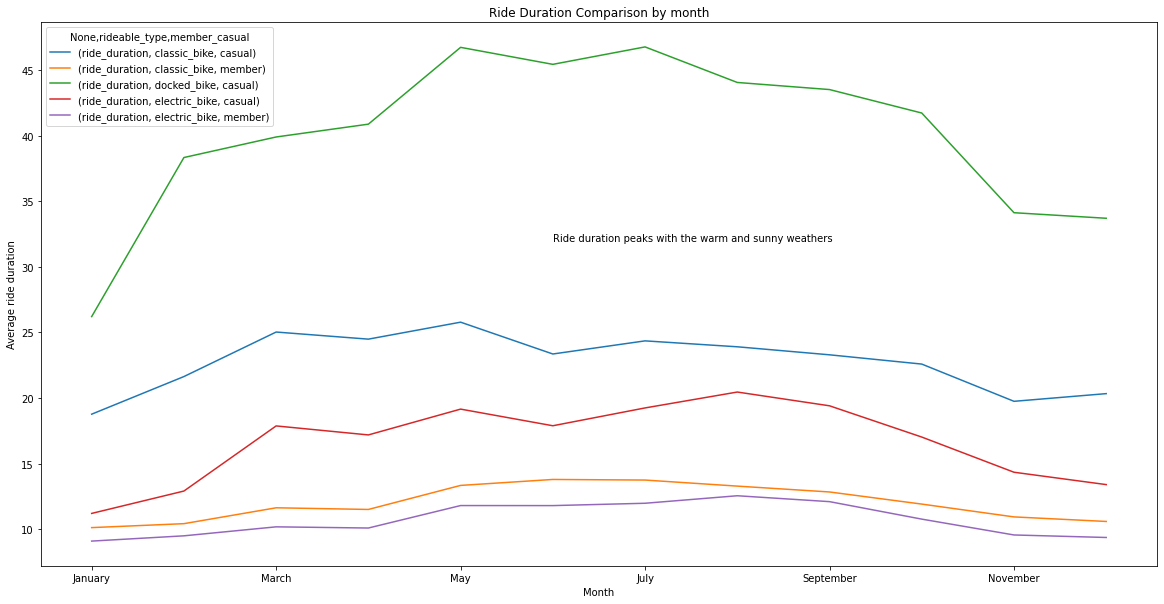

In [116]:
data.pivot_table(index=['month'], columns = ['rideable_type', 'member_casual'], aggfunc={'ride_duration':'mean'}).reindex(['January','February','March','April','May','June','July','August','September','October','November','December']).plot(figsize=(20,10))
plt.xlabel('Month')
plt.ylabel('Average ride duration')


plt.title('Ride Duration Comparison by month')
plt.text(5,32,'Ride duration peaks with the warm and sunny weathers')

Text(0.5, 1.0, 'Ride Duration Comparison by Day and Bike Types')

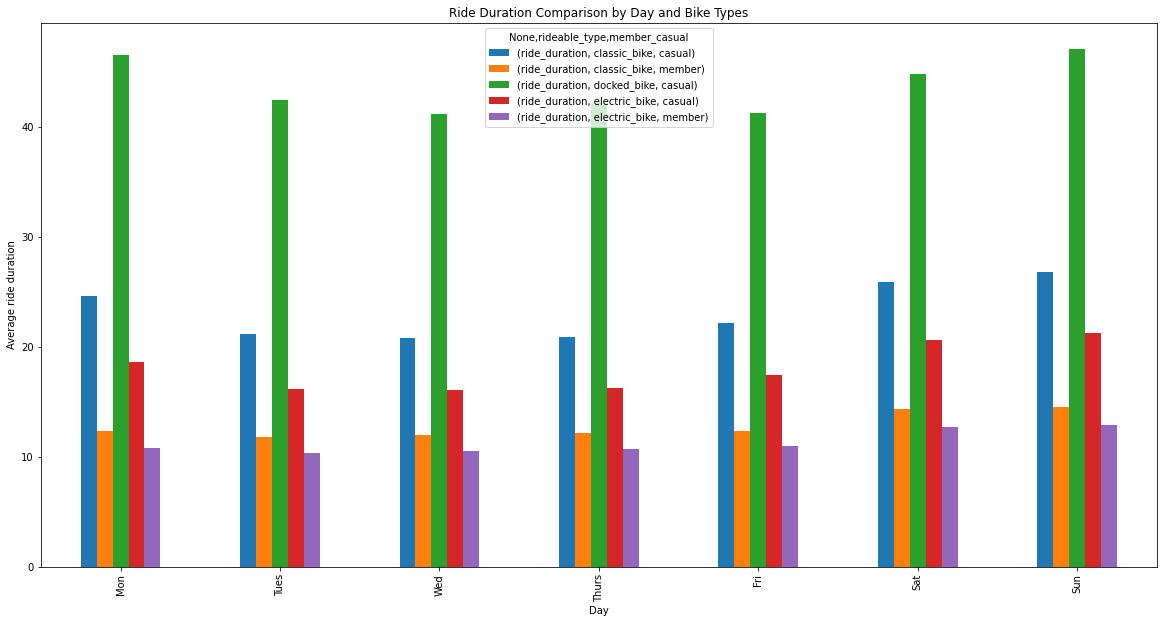

In [128]:
data.pivot_table(index=['day'], columns = ['rideable_type', 'member_casual'], aggfunc={'ride_duration':'mean'}).reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).plot(kind = 'bar',figsize=(20,10))
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day')
plt.ylabel('Average ride duration')


plt.title('Ride Duration Comparison by Day and Bike Types')


- Docked bikes are the most preferred by casual riders and average time per ride beats all the other bike types.
- Casual riders have a longer rides because of the pricing policy.

In [112]:
casual_data = data[data['member_casual']=='casual']

Text(5, 32, 'Casual riders prefer weekends and warmer seasons')

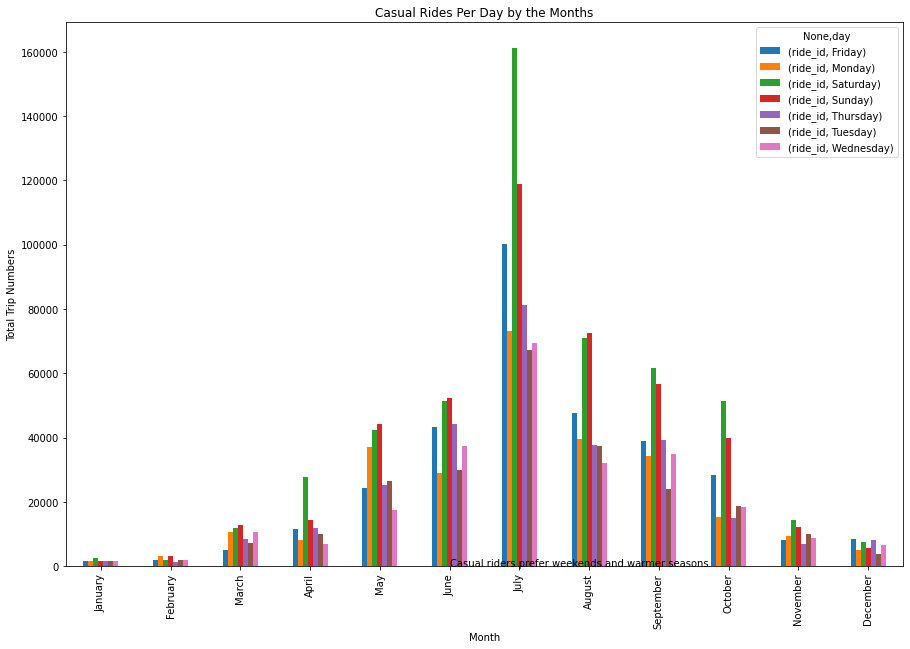

In [117]:



casual_data.pivot_table(index='month',columns='day',aggfunc={'ride_id':'count'}).reindex(['January','February','March','April','May','June','July','August','September','October','November','December']).plot(kind='bar',figsize=(15,10))

plt.xlabel('Month')
plt.ylabel('Total Trip Numbers')


plt.title('Casual Rides Per Day by the Months')
plt.text(5,32,'Casual riders prefer weekends and warmer seasons')

- Casual riders are seasonal customer types and they prefer weekends and warmer seasons

In [119]:
member_data = data[data['member_casual']=='member']

Text(5, 50, 'Casual riders prefer weekends and warmer seasons')

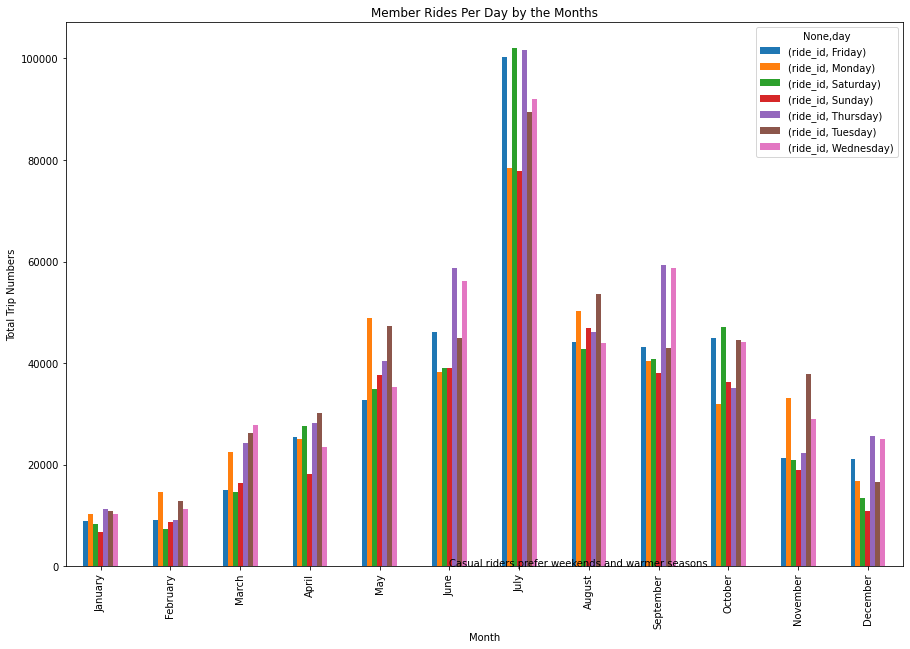

In [125]:



member_data.pivot_table(index='month',columns='day',aggfunc={'ride_id':'count'}).reindex(['January','February','March','April','May','June','July','August','September','October','November','December']).plot(kind='bar',figsize=(15,10))

plt.xlabel('Month')
plt.ylabel('Total Trip Numbers')


plt.title('Member Rides Per Day by the Months')



- Members are using the bikes all of the year and they prefer using the service during the weekdays. However, during the weekends in July they also prefer the weekends more.

** Recommendations

To convert casual riders into annual members, the following marketing strategies can be applied:

- Rental duration problem of classic and especially docked bikes needs to be investigated deeply.
- Offering membership discounts to casual riders in spring, and on Fridays for the following weekend would increase the probability of attracting more casual riders into members. By offering a free full-day trip by SMS, I am assuming customers need to provide either an email or phone number to rent a bike.
- Offering seasonal packages would help to convert casual riders since they are interested in using the service in the spring and mostly summertime. Because nobody wants to pay the annual subscription for a service that they don't require all the time.
- Or increasing the renting price of the bikes for the weekends for casual riders, especially for docked and classic bikes, since they are preferred more by casual users.
- Putting special discount offers at stations or on bikes would target casual users which might influence them to become members.